# Iris species detection using Neural Network :

---



## Importing the libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

## Importing the dataset :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/datasets/Iris.csv")
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Discovering our dataset :

Since we have an unwanted column 'Id', we're going to drop it.

In [ ]:
dataset.drop(columns=["Id"], inplace=True)

dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As we can see, we have no missing values, but we should convert the 'Species' column into categorical data.

In [ ]:
dataset["Species"] = dataset["Species"].astype("category")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  150 non-null    float64 
 1   SepalWidthCm   150 non-null    float64 
 2   PetalLengthCm  150 non-null    float64 
 3   PetalWidthCm   150 non-null    float64 
 4   Species        150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


Let's see how many species we have. :

In [ ]:
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data preprocessing :

Let's check the range of our features :

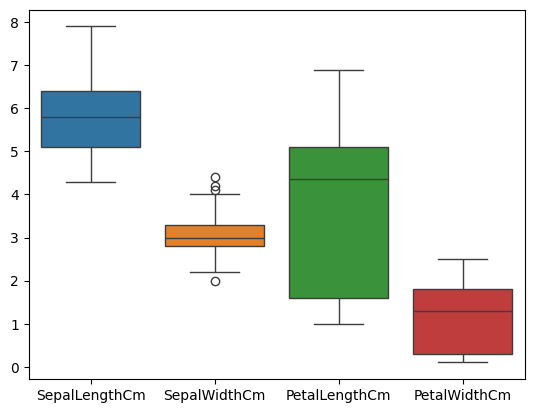

In [ ]:
sns.boxplot(data=dataset)
plt.show()

As we noticed, the ranges of our features are not scalable due to the existence of some outliers in the 'SepalWidthCm' column.

Let's remove the outliers :

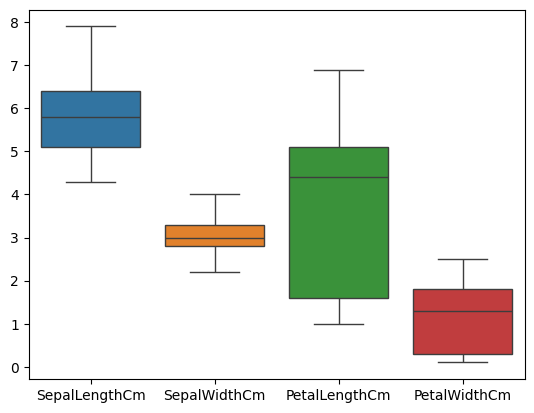

In [ ]:
Q1 = dataset["SepalWidthCm"].quantile(0.25)
Q3 = dataset["SepalWidthCm"].quantile(0.75)

IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

dataset = dataset[(dataset["SepalWidthCm"] >= LB) & (dataset["SepalWidthCm"] <= UB)]

sns.boxplot(data=dataset)
plt.show()

Before scaling our features, let's transform our target into numerical values :

In [ ]:
#Iris-setosa        = 0
#Iris-versicolor    = 1
#Iris-virginica     = 2

encoder = LabelEncoder()

dataset["Species"] = encoder.fit_transform(dataset["Species"])

dataset["Species"].value_counts()

2    50
1    49
0    47
Name: Species, dtype: int64

Splitting and scalling our dataset :

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:10]

array([[-1.03285985,  1.41069256, -1.42794497, -1.41406995],
       [-0.79347575,  1.16199904, -1.3698047 , -1.41406995],
       [ 0.28375271, -0.08146857,  0.60696432,  0.77120384],
       [ 0.64282886, -0.57885561,  1.01394618,  1.31752229],
       [-0.9131678 ,  1.16199904, -1.42794497, -1.27749034],
       [-0.55409165,  1.65938608, -1.3698047 , -1.41406995],
       [-0.07532345, -0.82754913,  0.72324485,  0.90778345],
       [-0.31470755, -0.08146857,  0.1418422 ,  0.08830578],
       [ 0.52313681, -1.32493617,  0.60696432,  0.36146501],
       [ 0.76252091, -0.57885561,  0.43254353,  0.36146501]])

## Model training :

The neural network model consists of **two dense layers**. The first layer has 10 neurons and uses the **ReLU activation** function. It takes input of shape (4,), meaning it expects input data with four features (*SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm*). The second layer has 3 neurons and uses the **softmax activation** function because we have a **multi-class classification** problem.

The model is compiled using the **Adam optimizer**. The **loss function** used is **Sparse Categorical Crossentropy**. The 'from_logits' argument indicates that the output of the model is not normalized before computing the loss for prevent roundoff errors.

In [ ]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                50        
                                                                 
 dense_15 (Dense)            (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 1s 78ms/step - loss: 1.1349 - accuracy: 0.2931 - val_loss: 1.1202 - val_accuracy: 0.4000
Epoch 2/400
4/4 [==============================] - 0s 12ms/step - loss: 1.1082 - accuracy: 0.3017 - val_loss: 1.0901 - val_accuracy: 0.4000
Epoch 3/400
4/4 [==============================] - 0s 18ms/step - loss: 1.0825 - accuracy: 0.3017 - val_loss: 1.0611 - val_accuracy: 0.4000
Epoch 4/400
4/4 [==============================] - 0s 18ms/step - loss: 1.0589 - accuracy: 0.3190 - val_loss: 1.0333 - val_accuracy: 0.4000
Epoch 5/400
4/4 [==============================] - 0s 13ms/step - loss: 1.0358 - accuracy: 0.3190 - val_loss: 1.0067 - val_accuracy: 0.4000
Epoch 6/400
4/4 [==============================] - 0s 17ms/step - loss: 1.0124 - accuracy: 0.3276 - val_loss: 0.9815 - val_accuracy: 0.4333
Epoch 7/400
4/4 [==============================] - 0s 19ms/step - loss: 0.9912 - accuracy: 0.3793 - val_loss: 0.9571 - val_accuracy: 0.4333
Epoch 8/400
4/4 [===============

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

1/1 [==============================] - 0s 130ms/step - loss: 0.1046 - accuracy: 0.9333


0.9333333373069763

The accuracy of this model is : 93%